In [2]:
import h5py
import numpy as np
import torch


num_sample 1
Time to load 1 samples: 0.09 seconds
batches/sec: 10.57
num_sample 10
Time to load 10 samples: 0.82 seconds
batches/sec: 1.22
num_sample 50
Time to load 50 samples: 3.67 seconds
batches/sec: 0.27
num_sample 100
Time to load 100 samples: 6.91 seconds
batches/sec: 0.14


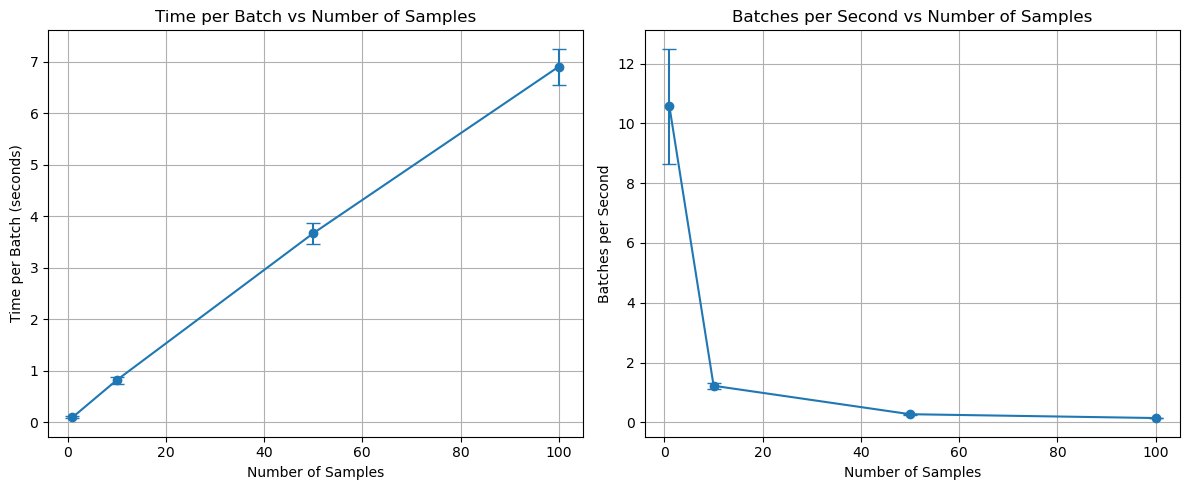

In [15]:

def load_h5_data(h5file, indecies, dataset_name, shape):
    data = []
    for idx in indecies:
        i = idx // shape[1]
        j = idx % shape[1]
        data.append(h5file[dataset_name][i, j, :])
    return np.stack(data)

# Create test data
test_file = "/grid/hackathon/data_norepl/splarseers/output/embed_train.h5"
test_dataset = "embed_train"
num_samples = [1,10,50,100]
cycles = 10 

# Time the loading
import time

with h5py.File(test_file, 'r') as f:
    shape = f[test_dataset].shape
    mean_time = []
    std_time = []
    for num_sample in num_samples:
        print(f"num_sample {num_sample}")
        cycle_time = []
        for i in range(cycles):
            
            start_time = time.time()
            
            indices = np.random.randint(0, shape[0] * shape[1], size=num_sample)
            data = load_h5_data(f, indices, test_dataset, shape)

            end_time = time.time()
            cycle_time.append(end_time - start_time)
        mean_time.append(np.mean(cycle_time))
        std_time.append(np.std(cycle_time))
        print(f"Time to load {num_sample} samples: {mean_time[-1]:.2f} seconds")
        print(f"batches/sec: {1/(mean_time[-1]):.2f}")

# Plot results
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot time per batch
ax1.errorbar(num_samples, mean_time, yerr=std_time, fmt='o-', capsize=5)
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Time per Batch (seconds)')
ax1.set_title('Time per Batch vs Number of Samples')
ax1.grid(True)

# Plot batches per second 
batches_per_sec = 1/np.array(mean_time)
batches_per_sec_std = std_time/(np.array(mean_time)**2)
ax2.errorbar(num_samples, batches_per_sec, yerr=batches_per_sec_std, fmt='o-', capsize=5)
ax2.set_xlabel('Number of Samples') 
ax2.set_ylabel('Batches per Second')
ax2.set_title('Batches per Second vs Number of Samples')
ax2.grid(True)

plt.tight_layout()
plt.show()




num_sample 1
Time to load 1 samples: 0.27 seconds
batches/sec: 3.69
num_sample 10
Time to load 10 samples: 2.56 seconds
batches/sec: 0.39
num_sample 50
Time to load 50 samples: 13.09 seconds
batches/sec: 0.08
num_sample 100
Time to load 100 samples: 28.65 seconds
batches/sec: 0.03


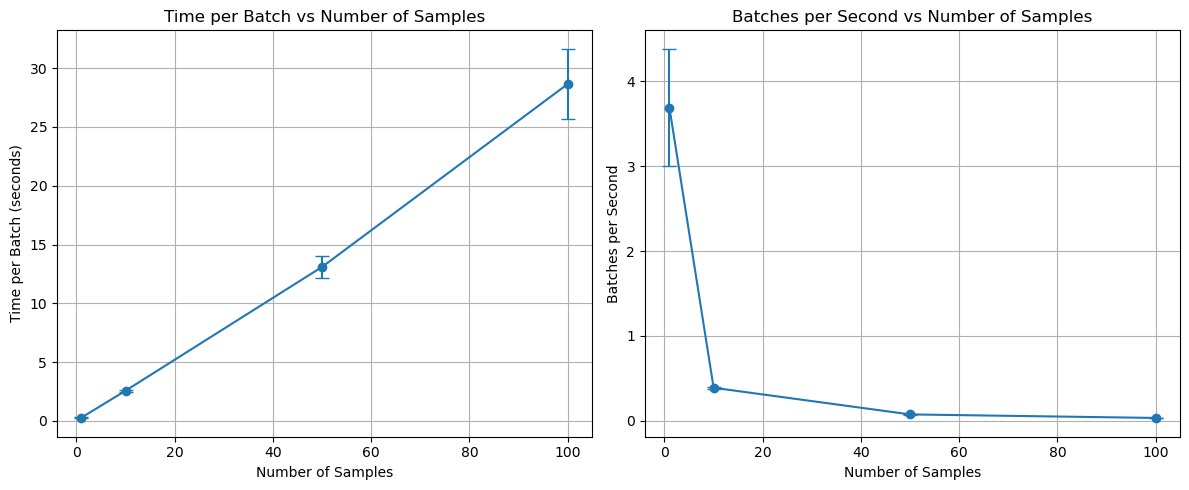

In [18]:
def load_h5_data(h5file, indecies, dataset_name, shape):
    sort_order = np.argsort(indecies)
    indecies = indecies[sort_order]
    return_order = np.argsort(sort_order)

    i_idxs = indecies // shape[1]
    j_idxs = indecies % shape[1]

    data_v1 = h5file[dataset_name][i_idxs, :, :]
    data = data_v1[range(len(i_idxs)), j_idxs, :]
    return data[return_order]




# Create test data
test_file = "/grid/hackathon/data_norepl/splarseers/output/embed_train.h5"
test_dataset = "embed_train"
num_samples = [1,10,50,100]
cycles = 10 

# Time the loading
import time

with h5py.File(test_file, 'r') as f:
    shape = f[test_dataset].shape
    mean_time = []
    std_time = []
    for num_sample in num_samples:
        print(f"num_sample {num_sample}")
        cycle_time = []
        for i in range(cycles):
            
            start_time = time.time()
            
            indices = np.random.randint(0, shape[0] * shape[1], size=num_sample)
            data = load_h5_data(f, indices, test_dataset, shape)

            end_time = time.time()
            cycle_time.append(end_time - start_time)
        mean_time.append(np.mean(cycle_time))
        std_time.append(np.std(cycle_time))
        print(f"Time to load {num_sample} samples: {mean_time[-1]:.2f} seconds")
        print(f"batches/sec: {1/(mean_time[-1]):.2f}")

# Plot results
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot time per batch
ax1.errorbar(num_samples, mean_time, yerr=std_time, fmt='o-', capsize=5)
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Time per Batch (seconds)')
ax1.set_title('Time per Batch vs Number of Samples')
ax1.grid(True)

# Plot batches per second 
batches_per_sec = 1/np.array(mean_time)
batches_per_sec_std = std_time/(np.array(mean_time)**2)
ax2.errorbar(num_samples, batches_per_sec, yerr=batches_per_sec_std, fmt='o-', capsize=5)
ax2.set_xlabel('Number of Samples') 
ax2.set_ylabel('Batches per Second')
ax2.set_title('Batches per Second vs Number of Samples')
ax2.grid(True)

plt.tight_layout()
plt.show()

